In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/employee-compensation.csv')
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [6]:
df.shape

(683277, 22)

In [7]:
df.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [8]:
df.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [9]:
col_names=df.columns
for i in col_names:
  print(i,'has :', df[i].nunique(),"Unique values")

Organization Group Code has : 7 Unique values
Job Family Code has : 59 Unique values
Job Code has : 1210 Unique values
Year Type has : 2 Unique values
Year has : 8 Unique values
Organization Group has : 7 Unique values
Department Code has : 60 Unique values
Department has : 109 Unique values
Union Code has : 70 Unique values
Union has : 129 Unique values
Job Family has : 59 Unique values
Job has : 1349 Unique values
Employee Identifier has : 309750 Unique values
Salaries has : 498512 Unique values
Overtime has : 262033 Unique values
Other Salaries has : 307854 Unique values
Total Salary has : 615223 Unique values
Retirement has : 451716 Unique values
Health and Dental has : 209969 Unique values
Other Benefits has : 496200 Unique values
Total Benefits has : 616499 Unique values
Total Compensation has : 658692 Unique values


In [10]:
df.Union.unique()

array(['Prof & Tech Engineers - Miscellaneous, Local 21',
       'Prof & Tech Engineers - Personnel, Local 21',
       'Municipal Executive Association - Miscellaneous',
       "Deputy Probation Officers' Association",
       'SEIU - Miscellaneous, Local 1021',
       'Operating Engineers - Sup Probation Ofcrs, Local 3',
       'Prof & Tech Engineers - Court Employees, Local 21',
       'Prof & Tech Engineers - Court Attorneys, Local 21',
       'Court Interpreters, Local 39521',
       'Court Unrepresented Professionals',
       'Court Unrepresented Managers',
       'Prof & Tech Engineers - Court Reporters, Local 21',
       'Municipal Executive Association - Court',
       'SEIU - Court Employees, Local 1021',
       'Court Unrepresented Bench Officers',
       'Management Unrepresented Employees',
       "Municipal Attorneys' Association",
       "District Attorney Investigators' Association",
       'Elected Officials', 'Miscellaneous Unrepresented Employees',
       'Physicians a

In [11]:
df.Overtime.unique()

array([   0.  ,  557.16,  609.51, ...,  505.88, 1668.76, 1707.72])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


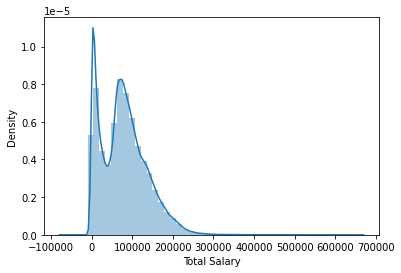

In [12]:
sns.distplot(df['Total Salary'])
plt.show()

In [13]:
print("Skewness: %f" % df['Total Salary'].skew())
print("Kurtosis: %f" % df['Total Salary'].kurt())

Skewness: 0.644536
Kurtosis: 0.482735


In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans=KMeans(n_clusters=3)

In [16]:
df.columns

Index(['Organization Group Code', 'Job Family Code', 'Job Code', 'Year Type',
       'Year', 'Organization Group', 'Department Code', 'Department',
       'Union Code', 'Union', 'Job Family', 'Job', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [17]:
kmeans.fit(df.drop(['Organization Group Code','Job Family Code','Job Code','Year Type','Year','Organization Group','Department Code','Department', 'Union Code', 'Union', 'Job Family', 'Job', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries','Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits', ],axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
print(kmeans.cluster_centers_)

[[ 17364.38382848  23999.60926936]
 [ 82649.17466131 116657.09871386]
 [159778.90489835 209113.14087451]]


In [19]:
y=kmeans.labels_
print(y)

[1 1 1 ... 1 1 1]


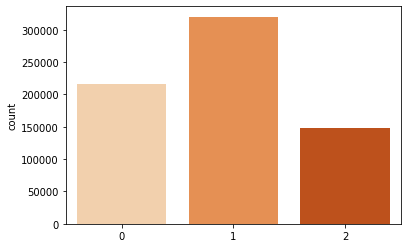

In [20]:
sns.countplot(x=kmeans.labels_, palette='Oranges')
plt.show()

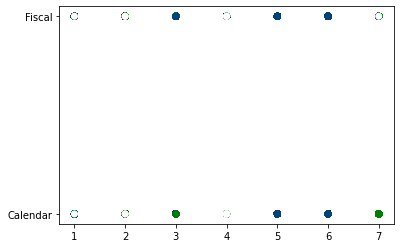

In [21]:
plt.scatter(df.iloc[:,0].values,df.iloc[:,3].values, c=kmeans.labels_, cmap="ocean")
plt.show()

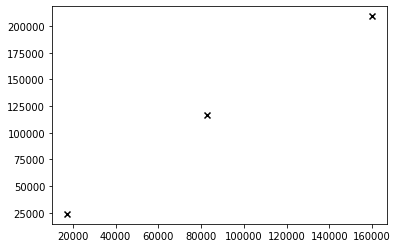

In [22]:
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')

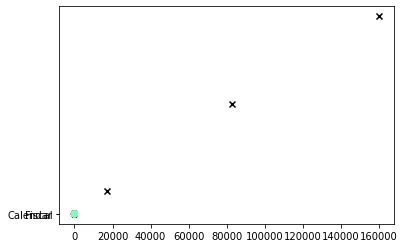

In [23]:
plt.scatter(df.iloc[:,0].values,df.iloc[:,3].values, c=kmeans.labels_, cmap="rainbow")
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.show()

In [24]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

In [26]:
k = range(1,10)
X = df.drop(['Organization Group Code','Job Family Code','Job Code','Year Type','Year','Organization Group','Department Code','Department', 'Union Code', 'Union', 'Job Family', 'Job', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries','Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits'],axis=1)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

NameError: ignored

In [27]:
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2)/X.shape[0]
bss = tss-wcss
varExplained = bss/tss*100

NameError: ignored

In [28]:
kIdx = 10-1

NameError: ignored

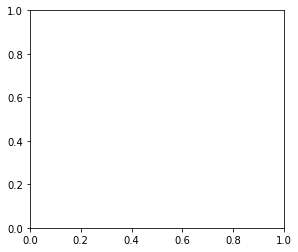

In [29]:
kIdx = 2

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.subplot(1, 2, 2)
plt.plot(K, varExplained, 'b*-')
plt.plot(K[kIdx], varExplained[kIdx], marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')
plt.tight_layout()

In [39]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [40]:
silhouette_score(X,y)

KeyboardInterrupt: ignored

In [37]:
from sklearn.metrics import silhouette_score
from matplotlib import cm


In [ ]:
score = []
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    score.append(silhouette_score(X, labels, metric='euclidean'))

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(score)
plt.grid(True)
plt.ylabel("Silouette Score")
plt.xlabel("k")
plt.title("Silouette for K-means")